In [87]:
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
import joblib

In [ ]:
df = pd.read_csv(r"Fraud_Detection_Dataset.csv")

            1) EDA

In [81]:
df.head()

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0.0,1.0,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9.0,0.0,Current,3/1/2018,Morning,0.0
1,1.0,1.0,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10.0,0.0,Savings,5/1/2018,Morning,0.0
2,2.0,1.0,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2.0,0.0,Current,7/1/2018,Morning,1.0
3,4.0,1.0,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17.0,0.0,Current,6/1/2018,Morning,0.0
4,5.0,1.0,PAYMENT,Australia,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,14.0,0.0,Current,8/1/2018,Morning,0.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10122 non-null  float64
 1   step                 10122 non-null  float64
 2   type                 10118 non-null  object 
 3   branch               10122 non-null  object 
 4   amount               10120 non-null  float64
 5   nameOrig             10116 non-null  object 
 6   oldbalanceOrg        10120 non-null  float64
 7   newbalanceOrig       10122 non-null  float64
 8   nameDest             10116 non-null  object 
 9   oldbalanceDest       10121 non-null  float64
 10  newbalanceDest       10120 non-null  float64
 11  unusuallogin         10122 non-null  float64
 12  isFlaggedFraud       10122 non-null  float64
 13  Acct type            10112 non-null  object 
 14  Date of transaction  10115 non-null  object 
 15  Time of day          10120 non-null 

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


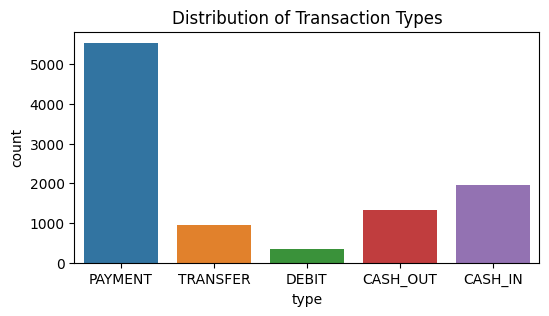

In [75]:
# Visualize the distribution of transaction types
plt.figure(figsize=(6, 3))
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

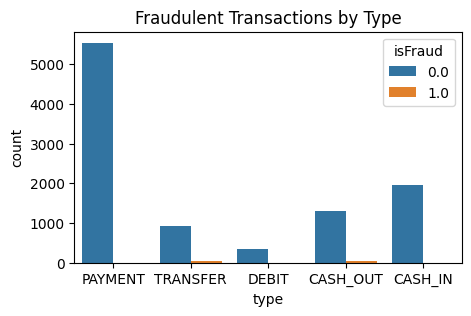

In [76]:
# Explore the relationship between 'type' and 'isFraud'
plt.figure(figsize=(5, 3))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraudulent Transactions by Type')
plt.show()

In [77]:
# Get value counts for 'type' for fraudulent transactions
fraudulent_types = df[df['isFraud'] == 1]['type'].value_counts()

# Print the result
print("Value counts for 'type' for fraudulent transactions:")
print(fraudulent_types)

Value counts for 'type' for fraudulent transactions:
type
TRANSFER    33
CASH_OUT    33
Name: count, dtype: int64


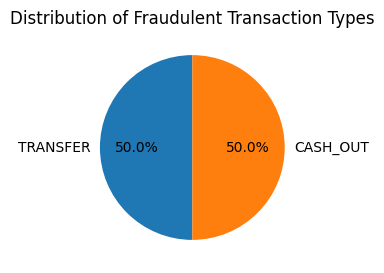

In [78]:
# Plot a pie chart
plt.figure(figsize=(3, 3))
plt.pie(fraudulent_types, labels=fraudulent_types.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Fraudulent Transaction Types")
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


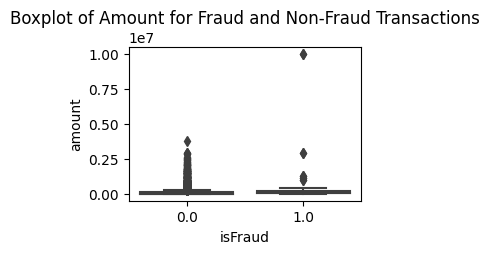

In [79]:
# Boxplot to identify outliers in 'amount' column
plt.figure(figsize=(3, 2))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Boxplot of Amount for Fraud and Non-Fraud Transactions')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


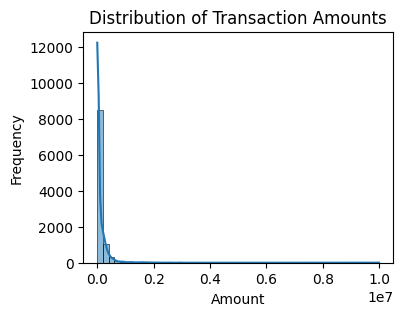

In [80]:
# Explore the distribution of transaction amounts
plt.figure(figsize=(4, 3))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

            2) Data Pre-processing

                    2.1) Data Cleaning

In [89]:
print(df.isnull().sum())
df = df.dropna()

Unnamed: 0              1
step                    1
type                    5
branch                  1
amount                  3
nameOrig                7
oldbalanceOrg           3
newbalanceOrig          1
nameDest                7
oldbalanceDest          2
newbalanceDest          3
unusuallogin            1
isFlaggedFraud          1
Acct type              11
Date of transaction     8
Time of day             3
isFraud                 3
dtype: int64


In [90]:
df = df.drop(columns=['Unnamed: 0', 'nameOrig', 'nameDest']) 

In [91]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [92]:
# Convert 'Date of transaction' to datetime with the correct format
df['Date of transaction'] = pd.to_datetime(df['Date of transaction'], format='%d/%m/%Y')

# Extract date, month, and year
df['Date'] = df['Date of transaction'].dt.day
df['Month'] = df['Date of transaction'].dt.month
df['Year'] = df['Date of transaction'].dt.year

In [93]:
print(df[['Date', 'Month', 'Year']].head(10).to_string(index=False))

 Date  Month  Year
    3      1  2018
    5      1  2018
    7      1  2018
    6      1  2018
    8      1  2018
   10      1  2018
   11      1  2018
   13      1  2018
   16      1  2018
   19      1  2018


                    2.2) Encoding

In [94]:
categorical_cols = ['type', 'branch', 'Acct type', 'Date', 'Month', 'Year', 'Time of day']

encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = encoders[col].fit_transform(df[col])

In [95]:
df = df.drop(columns=['branch', 'Acct type', 'type', 'Time of day', 'Date', 'Month', 'Year', 'Date of transaction']) 

In [30]:
df.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,isFraud
0,1.0,9839.64,170136.00,160296.36,0.0,0.00,9.0,0.0,0.0
1,1.0,1864.28,21249.00,19384.72,0.0,0.00,10.0,0.0,0.0
2,1.0,181.00,181.00,0.00,0.0,0.00,2.0,0.0,1.0
3,1.0,11668.14,41554.00,29885.86,0.0,0.00,17.0,0.0,0.0
4,1.0,7817.71,53860.00,46042.29,0.0,0.00,14.0,0.0,0.0
6,1.0,7861.64,176087.23,168225.59,0.0,0.00,19.0,0.0,0.0
7,1.0,4024.36,2671.00,0.00,0.0,0.00,10.0,0.0,0.0
9,1.0,9644.94,4465.00,0.00,10845.0,157982.12,4.0,0.0,0.0
10,1.0,3099.97,20771.00,17671.03,0.0,0.00,10.0,0.0,0.0
11,1.0,2560.74,5070.00,2509.26,0.0,0.00,10.0,0.0,0.0


                    2.3) Sampling

In [20]:
class_counts = df['isFraud'].value_counts()

# Display the count of classes
print("Class Counts in 'isFraud':")
print(class_counts)

Class Counts in 'isFraud':
isFraud
0.0    10017
1.0       66
Name: count, dtype: int64


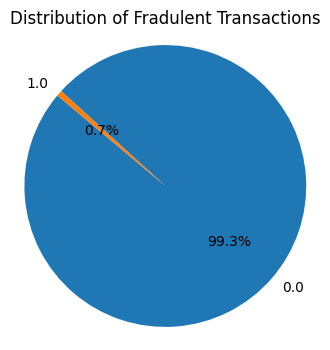

In [21]:
# Calculate the distribution of sentiments
fraud_counts = df['isFraud'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fradulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

                3) Feature Selection Using PCA

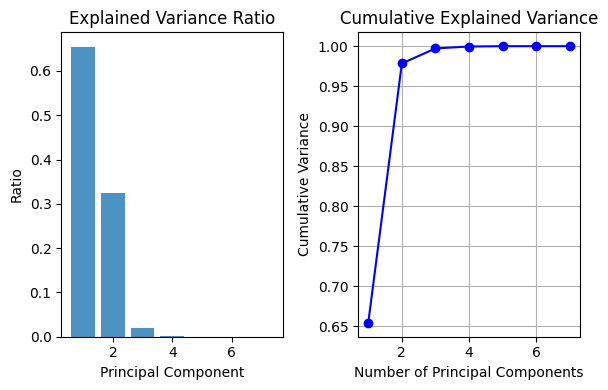

In [55]:
from sklearn.decomposition import PCA

# Extract features (X)
X = df.drop(['isFraud'], axis=1)  # Exclude the target variable if it's present in your dataset
y = df['isFraud']  # Target variable

# Apply PCA
pca = PCA(n_components='mle', svd_solver='full')
X_pca = pca.fit_transform(X)

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(6, 4))

# Plot explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Ratio')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)

plt.tight_layout()
plt.show()

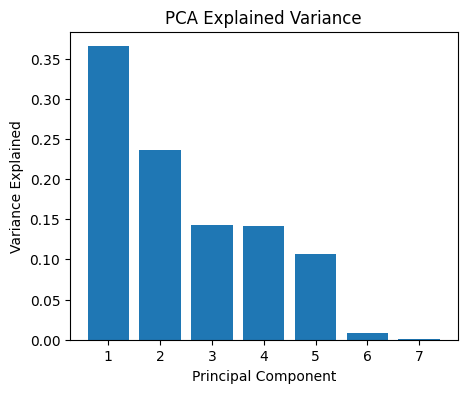

In [58]:
# PCA Component Analysis
pca = PCA(n_components='mle', svd_solver='full')
pca.fit(StandardScaler().fit_transform(X))

plt.figure(figsize=(5, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance')
plt.show()

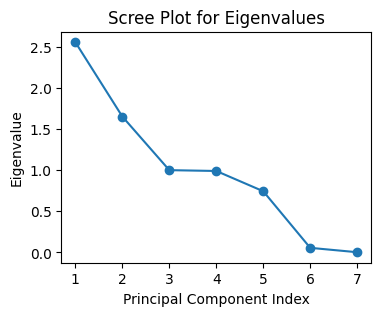

In [60]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

plt.figure(figsize=(4, 3))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Eigenvalues')
plt.show()

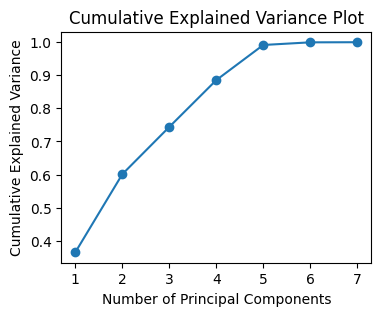

In [62]:
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(4, 3))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

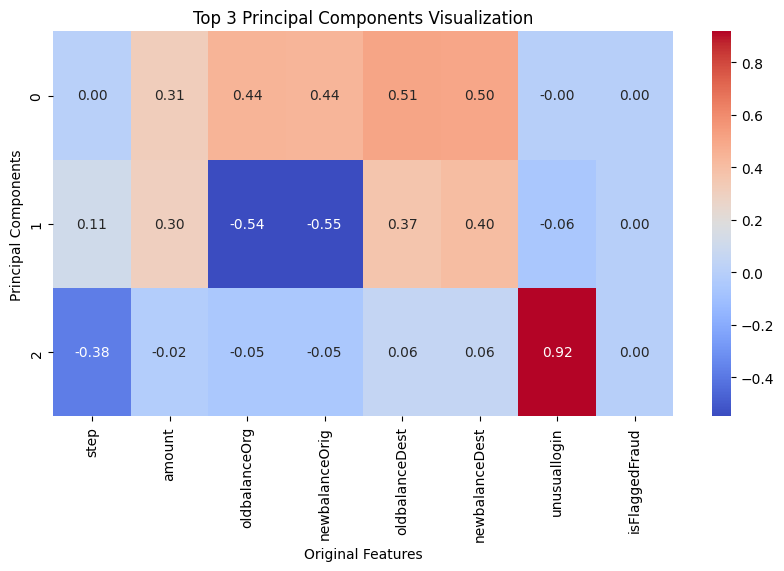

In [65]:
n_top_components = 3  # Choose the number of top components to visualize

top_components = pd.DataFrame(eigenvectors[:n_top_components, :], columns=X.columns)
plt.figure(figsize=(10, 5))
sns.heatmap(top_components, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title(f'Top {n_top_components} Principal Components Visualization')
plt.show()

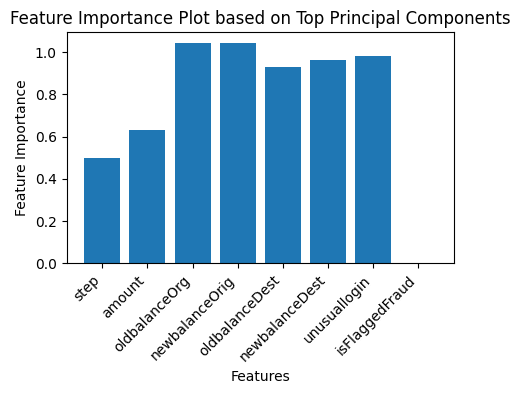

In [68]:
feature_importance = np.abs(eigenvectors[:n_top_components, :]).sum(axis=0)

plt.figure(figsize=(5, 3))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot based on Top Principal Components')
plt.xticks(rotation=45, ha='right')
plt.show()

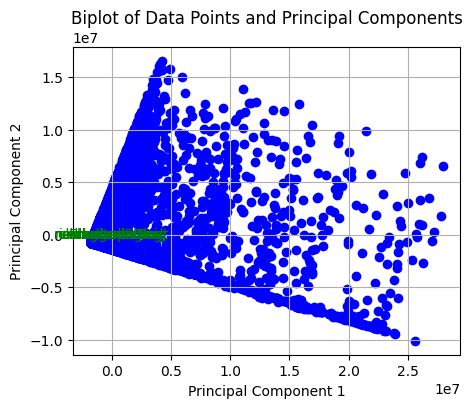

In [71]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(5,4))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    plt.scatter(xs, ys, color='b')
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()

biplot(X_pca[:, :2], np.transpose(pca.components_[:2, :]), labels=X.columns)
plt.title('Biplot of Data Points and Principal Components')
plt.show()

            4) Training ML Model (SVM)

In [96]:
X = df.drop('isFraud', axis=1)
y = df['isFraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = compute_class_weight(
    class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components='mle', svd_solver='full'),
    SVC(kernel='linear', random_state=42, class_weight=class_weights_dict)
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components='mle', svd_solver='full')),
                ('svc',
                 SVC(class_weight={0: 0.5032443224357375, 1: 77.5576923076923},
                     kernel='linear', random_state=42))])

            5) Testing Model Accuracy

In [51]:
y_train_pred = pipeline.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc}")

Training Accuracy: 0.7293577981651376


In [52]:
y_test_pred = pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc}")

Test Accuracy: 0.7263262270699058


In [53]:
if train_acc > test_acc:
    performance_gap = train_acc - test_acc
    print(f"Overfitting-> Performance gap: {performance_gap}")
else:
    print("No overfitting detected.")

Overfitting-> Performance gap: 0.0030315710952317776


In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[1451  552]
 [   0   14]]


In [28]:
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      2003
           1       0.02      1.00      0.05        14

    accuracy                           0.73      2017
   macro avg       0.51      0.86      0.44      2017
weighted avg       0.99      0.73      0.83      2017



            5) Data Visualization

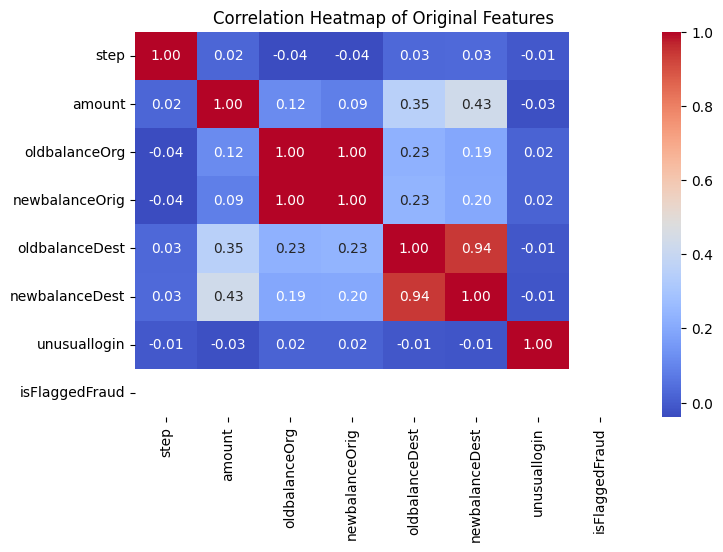

In [101]:
plt.figure(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Original Features')
plt.show()

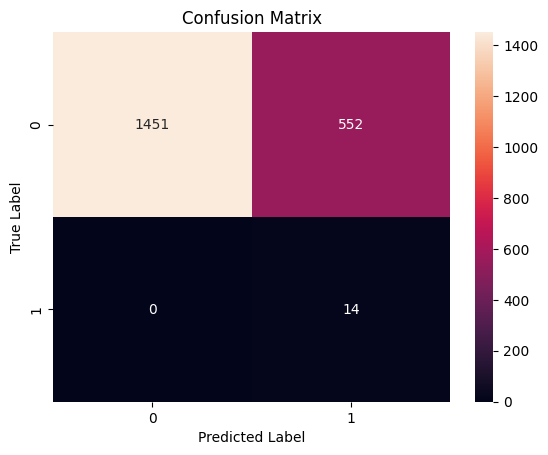

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

            6) Using the model to perform predictions:

In [34]:
def predict(new_data):
    df = new_data.drop(columns=['Unnamed: 0', 'nameOrig', 'nameDest']) 

    # Convert 'Date of transaction' to datetime with the correct format
    df['Date of transaction'] = pd.to_datetime(df['Date of transaction'], format='%d/%m/%Y')

    # Extract date, month, and year
    df['Date'] = df['Date of transaction'].dt.day
    df['Month'] = df['Date of transaction'].dt.month
    df['Year'] = df['Date of transaction'].dt.year

    for col in categorical_cols:
        df[col] = encoders[col].transform(df[col])

    df = df.drop(columns=['branch', 'Acct type', 'type', 'Time of day', 'Date', 'Month', 'Year', 'Date of transaction']) 

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    new_predictions = pipeline.predict(df)
    print(new_predictions)

Data with Target Variable 1:

In [35]:
dataset1 = pd.DataFrame({
    'Unnamed: 0': [0], 'step': [6], 'type': ['TRANSFER'], 'branch': ['Estados Unidos'],
    'amount': [85354.69], 'nameOrig': ['C558400671'], 'oldbalanceOrg': [85354.69],
    'newbalanceOrig': [0], 'nameDest': ['C527482085'], 'oldbalanceDest': [0],
    'newbalanceDest': [0], 'unusuallogin': [7], 'isFlaggedFraud': [0],
    'Acct type': ['Savings'], 'Date of transaction': ['05/01/2018'], 'Time of day': ['Afternoon']
})

predict(dataset1)

[1]


Data with Target Variable 0:

In [36]:
dataset2 = pd.DataFrame({
    'Unnamed: 0': [533], 'step': [1], 'type': ['PAYMENT'], 'branch': ['Australia'],
    'amount': [4402.86], 'nameOrig': ['C533415944'], 'oldbalanceOrg': [4469],
    'newbalanceOrig': [66.14], 'nameDest': ['M1919834117'], 'oldbalanceDest': [0],
    'newbalanceDest': [0], 'unusuallogin': [19], 'isFlaggedFraud': [0],
    'Acct type': ['Savings'], 'Date of transaction': ['9/1/2018'], 'Time of day': ['Afternoon']
})

predict(dataset2)

[0]


Data with Target Variable 0:

In [37]:
dataset3 = pd.DataFrame({
    'Unnamed: 0': [4901], 'step': [1], 'type': ['PAYMENT'],
    'branch': ['Australia'], 'amount': [4402.86], 'nameOrig': ['C533415944'],
    'oldbalanceOrg': [4469], 'newbalanceOrig': [66.14], 'nameDest': ['M1919834117'],
    'oldbalanceDest': [0], 'newbalanceDest': [0], 'unusuallogin': [19],
    'isFlaggedFraud': [0], 'Acct type': ['Savings'], 'Date of transaction': ['9/1/2018'],
    'Time of day': ['Afternoon']
})

predict(dataset3)

[0]


Data with Target Variable 1:

In [38]:
dataset4 = pd.DataFrame({
    'Unnamed: 0': [3], 'step': [1], 'type': ['CASH_OUT'], 'branch': ['Australia'], 'amount': [181],
    'nameOrig': ['C840083671'], 'oldbalanceOrg': [181], 'newbalanceOrig': [0],
    'nameDest': ['C38997010'], 'oldbalanceDest': [21182], 'newbalanceDest': [0],
    'unusuallogin': [1], 'isFlaggedFraud': [0], 'Acct type': ['Current'],
    'Date of transaction': ['6/1/2018'], 'Time of day': ['Afternoon']
})

predict(dataset4)

[1]


Data with Target Variable 0:

In [39]:
dataset5 = pd.DataFrame({
    'Unnamed: 0': [9052], 'step': [7], 'type': ['PAYMENT'], 'branch': ['El Salvador'],
    'amount': [3032.91], 'nameOrig': ['C1802302401'], 'oldbalanceOrg': [0],
    'newbalanceOrig': [0], 'nameDest': ['M117629468'], 'oldbalanceDest': [0],
    'newbalanceDest': [0], 'unusuallogin': [16], 'isFlaggedFraud': [0],
    'Acct type': ['Savings'], 'Date of transaction': ['11/1/2018'], 'Time of day': ['Afternoon']
})

predict(dataset5)

[0]
